In [1]:
%matplotlib inline


# Kimber Soiling Model

Examples of soiling using the Kimber model.


This example shows basic usage of pvlib's Kimber Soiling model [1]_ with
:py:func:`pvlib.soiling.kimber`.

## References
.. [1] "The Effect of Soiling on Large Grid-Connected Photovoltaic Systems
   in California and the Southwest Region of the United States," Adrianne
   Kimber, et al., IEEE 4th World Conference on Photovoltaic Energy
   Conference, 2006, :doi:`10.1109/WCPEC.2006.279690`

The Kimber Soiling model assumes that soiling builds up at a constant rate
until cleaned either manually or by rain. The rain must reach a threshold to
clean the panels. When rains exceeds the threshold, it's assumed the earth is
damp for a grace period before it begins to soil again. There is a maximum
soiling build up that cannot be exceeded even if there's no rain or
manual cleaning.

## Threshold
The example shown here demonstrates how the threshold affects soiling.
Because soiling depends on rainfall, loading weather data is always the first
step.



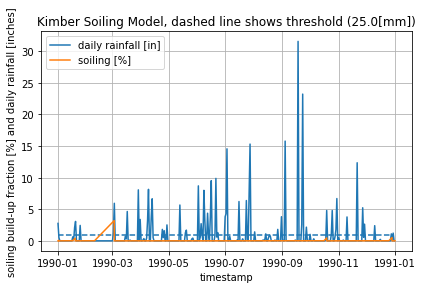

In [2]:
from datetime import datetime
import pathlib
from matplotlib import pyplot as plt
from pvlib.iotools import read_tmy3
from pvlib.soiling import kimber
import pvlib

# get full path to the data directory
DATA_DIR = pathlib.Path(pvlib.__file__).parent / 'data'

# get TMY3 data with rain
greensboro, _ = read_tmy3(DATA_DIR / '723170TYA.CSV', coerce_year=1990)
# get the rain data
greensboro_rain = greensboro.Lprecipdepth
# calculate soiling with no wash dates and cleaning threshold of 25-mm of rain
THRESHOLD = 25.0
soiling_no_wash = kimber(greensboro_rain, cleaning_threshold=THRESHOLD)
soiling_no_wash.name = 'soiling'
# daily rain totals
daily_rain = greensboro_rain.iloc[:-1].resample('D').sum()
plt.plot(
    daily_rain.index.to_pydatetime(), daily_rain.values/25.4,
    soiling_no_wash.index.to_pydatetime(), soiling_no_wash.values*100.0)
plt.hlines(
    THRESHOLD/25.4, xmin=datetime(1990, 1, 1), xmax=datetime(1990, 12, 31),
    linestyles='--')
plt.grid()
plt.title(
    f'Kimber Soiling Model, dashed line shows threshold ({THRESHOLD}[mm])')
plt.xlabel('timestamp')
plt.ylabel('soiling build-up fraction [%] and daily rainfall [inches]')
plt.legend(['daily rainfall [in]', 'soiling [%]'])
plt.tight_layout()

plt.show()